# Tarea 3 ICM3920

Alumno: Alonso Espinoza Correa

In [32]:
import matplotlib.pyplot as plt
import numpy as np

## Pregunta 1: Obtenga mediante el FVM el campo de presiones para el flujo al rededor de un bloque cuadrado suponiendo un flujo no rotacional e incompresible. Considere un canal de una longitud de $L = 4$ m y un ancho de $d = 1$ m. El cuadrado al centro tiene lados de $l= 0,4$ m.

POner foto del enunciado

Por la ecuación de continuidad se tiene que:

$$
\frac{\partial \rho}{\partial t} + \nabla (\rho \vec{u}) = 0
$$

Ahora, si se considera flujo incompresible y se plantean los supuestos necesarios para aplicar la teoría de flujo potencial ($\vec{u} = \nabla \phi$) se tiene:

$$
\nabla \cdot (\nabla \phi) = 0 \implies \nabla^2 \phi = 0
$$

Si se integra sobre un volumen $\Delta V$ como el que se muestra en la figura y se utiliza el teorema de la divergencia se obtiene:

$$
\int_{\partial V} \nabla \phi \cdot \hat{n} \, dS = 0
$$

El cual al desarrollar la expresión en las cuatro caras del volumen de control se tiene:

$$
    \int_{n} \nabla \phi_n \cdot \hat{y} \, dS_n + \int_{e} \nabla \phi_e \cdot \hat{x} \, dS_e - \int_{s} \nabla \phi_s \cdot \hat{y} \, dS_s - \int_{w} \nabla \phi_w \cdot \hat{x} \, dS_w = 0
$$

Ahora, dependiendo del nodo en el que nos encontremos, dependerá qué simplificación se utiliza para calcular los gradientes de velocidad. En algunos nodos se deberá calcular utilizando diferencias finitas, mientras que en otros nodos se deberán considerar las condiciones de borde. Utilizando diferencias finitas centradas, se tiene que:

$$
\nabla \phi_n \cdot \hat{y} \approx \frac{\phi_N - \phi_P}{\Delta y}, \quad
\nabla \phi_e \cdot \hat{x} \approx \frac{\phi_E - \phi_P}{\Delta x}
$$

$$
\nabla \phi_s \cdot \hat{y} \approx - \frac{\phi_P - \phi_S}{\Delta y}, \quad
\nabla \phi_2 \cdot \hat{x} \approx - \frac{\phi_P - \phi_W}{\Delta x}
$$

**Caso 1: Nodos intermedios**

![Captura de pantalla 2025-11-20 a la(s) 14.14.35.png](<attachment:Captura de pantalla 2025-11-20 a la(s) 14.14.35.png>)

$$
    \left( \frac{\phi_N - \phi_P}{\Delta y} \right)\Delta x + \left( \frac{\phi_E - \phi_P}{\Delta x} \right)\Delta y - \left( \frac{\phi_P - \phi_S}{\Delta y} \right)\Delta x - \left( \frac{\phi_P - \phi_W}{\Delta x} \right)\Delta y = 0
$$

Reordenando:

$$
    \frac{\phi_N - 2\phi_P + \phi_S}{\Delta y^2} + \frac{\phi_E - 2\phi_P + \phi_W}{\Delta x^2} = 0
$$


**Caso 2: Nodos sin flujo superior**

![Captura de pantalla 2025-11-20 a la(s) 14.14.42.png](<attachment:Captura de pantalla 2025-11-20 a la(s) 14.14.42.png>)


En este caso $\nabla \phi_n = 0$. Por tanto, se tiene:

$$
    0 + \left( \frac{\phi_E - \phi_P}{\Delta x} \right)\Delta y - \left( \frac{\phi_P - \phi_S}{\Delta y} \right)\Delta x - \left( \frac{\phi_P - \phi_W}{\Delta x} \right)\Delta y = 0
$$

**Caso 3: Nodos sin flujo inferior**

![Captura de pantalla 2025-11-20 a la(s) 14.14.48.png](<attachment:Captura de pantalla 2025-11-20 a la(s) 14.14.48.png>)

En este caso $\nabla \phi_s = 0$. Por tanto, se tiene:

$$
    \left( \frac{\phi_N - \phi_P}{\Delta y} \right)\Delta x + \left( \frac{\phi_E - \phi_P}{\Delta x} \right)\Delta y - 0 - \left( \frac{\phi_P - \phi_W}{\Delta x} \right)\Delta y = 0
$$

**Caso 4: Nodos de entrada**

![Captura de pantalla 2025-11-20 a la(s) 14.14.58.png](<attachment:Captura de pantalla 2025-11-20 a la(s) 14.14.58.png>)

En este caso, por condición de borde $\nabla \phi_w = v_0$. Así:

$$
    \left( \frac{\phi_N - \phi_P}{\Delta y} \right)\Delta x + \left( \frac{\phi_E - \phi_P}{\Delta x} \right)\Delta y - \left( \frac{\phi_P - \phi_S}{\Delta y} \right)\Delta x - v_0 \Delta y = 0
$$

***Caso especial: Nodos después del cubo***

![Captura de pantalla 2025-11-20 a la(s) 14.15.03.png](<attachment:Captura de pantalla 2025-11-20 a la(s) 14.15.03.png>)

En este caso la condición de borde es que $\nabla \phi_w = 0$. Por tanto, se tiene:

$$
    \left( \frac{\phi_N - \phi_P}{\Delta y} \right)\Delta x + \left( \frac{\phi_E - \phi_P}{\Delta x} \right)\Delta y - \left( \frac{\phi_P - \phi_S}{\Delta y} \right)\Delta x - 0 = 0
$$

**Caso 5: Nodos de salida**

![Captura de pantalla 2025-11-20 a la(s) 14.15.06.png](<attachment:Captura de pantalla 2025-11-20 a la(s) 14.15.06.png>)

En este caso $\nabla \phi_e = v_0$. Por tanto, se tiene:

$$
    \left( \frac{\phi_N - \phi_P}{\Delta y} \right)\Delta x + v_0 \Delta y - \left( \frac{\phi_P - \phi_S}{\Delta y} \right)\Delta x - \left( \frac{\phi_P - \phi_W}{\Delta x} \right)\Delta y = 0
$$

***Caso especial: Nodos antes del cuadrado***

![Captura de pantalla 2025-11-20 a la(s) 14.15.11.png](<attachment:Captura de pantalla 2025-11-20 a la(s) 14.15.11.png>)

En este caso $\nabla \phi_e = 0$. Por tanto, se tiene:

$$
    \left( \frac{\phi_N - \phi_P}{\Delta y} \right)\Delta x + 0 - \left( \frac{\phi_P - \phi_S}{\Delta y} \right)\Delta x - \left( \frac{\phi_P - \phi_W}{\Delta x} \right)\Delta y = 0
$$

**Caso 6: Esquinas**

![Captura de pantalla 2025-11-20 a la(s) 14.15.15.png](<attachment:Captura de pantalla 2025-11-20 a la(s) 14.15.15.png>)

***Esquina superior izquierda (A)***

En este caso $\nabla \phi_n = 0$ y $\nabla \phi_w = v_0$. Así:

$$
    0 + \left( \frac{\phi_E - \phi_P}{\Delta x} \right)\Delta y - \left( \frac{\phi_P - \phi_S}{\Delta y} \right)\Delta x - v_0\Delta y = 0
$$

***Esquina superior derecha (B)***

En este caso $\nabla \phi_n = 0$ y $\nabla \phi_e = v_0$. Así:

$$
    0 + v_0\Delta y - \left( \frac{\phi_P - \phi_S}{\Delta y} \right)\Delta x - \left( \frac{\phi_P - \phi_W}{\Delta x} \right)\Delta y = 0
$$

***Esquina inferior izquierda (C)***

En este caso $\nabla \phi_s = 0$ y $\nabla \phi_w = v_0$. Así:

$$
    \left( \frac{\phi_N - \phi_P}{\Delta y} \right)\Delta x + \left( \frac{\phi_E - \phi_P}{\Delta x} \right)\Delta y - 0 - v_0\Delta y = 0
$$

***Esquina inferior derecha (D)***

En este caso $\nabla \phi_s = 0$ y $\nabla \phi_e = v_0$. Así:

$$
    \left( \frac{\phi_N - \phi_P}{\Delta y} \right)\Delta x + v_0\Delta y - 0 - \left( \frac{\phi_P - \phi_W}{\Delta x} \right)\Delta y = 0
$$
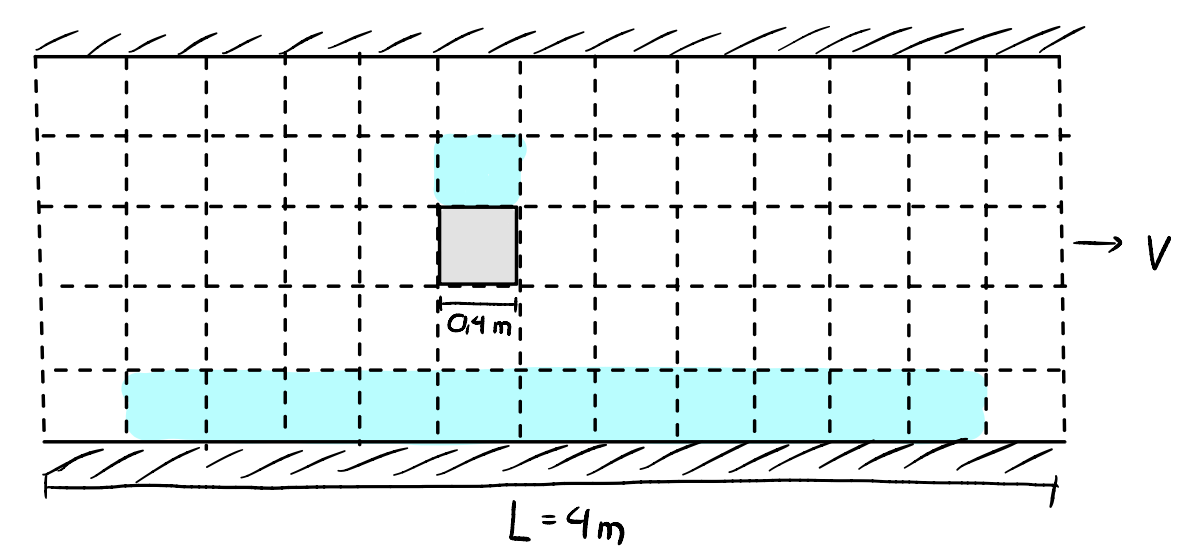
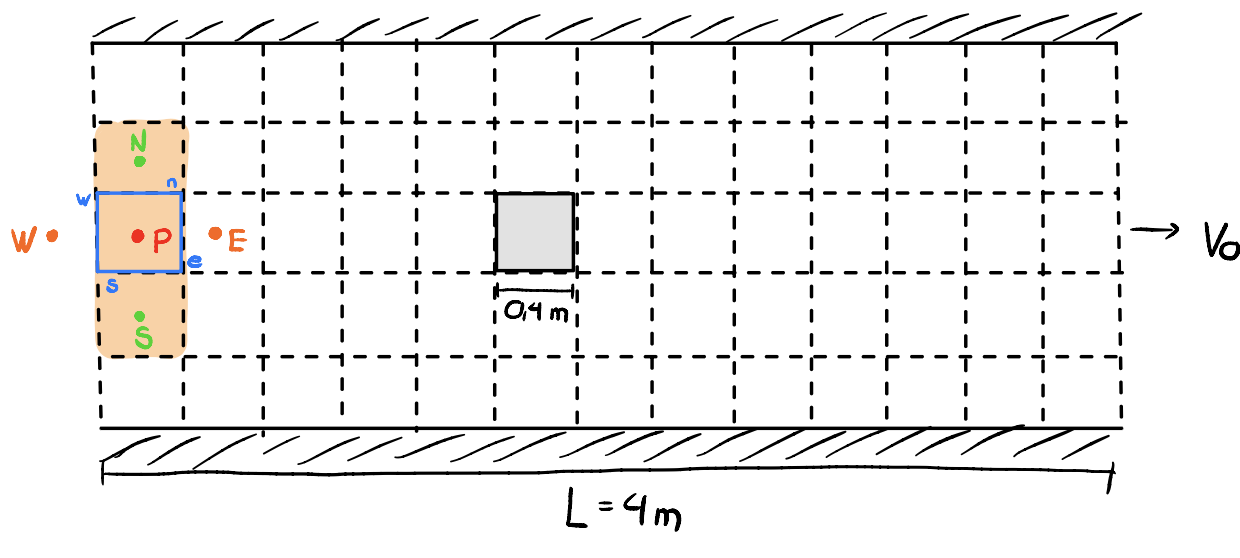
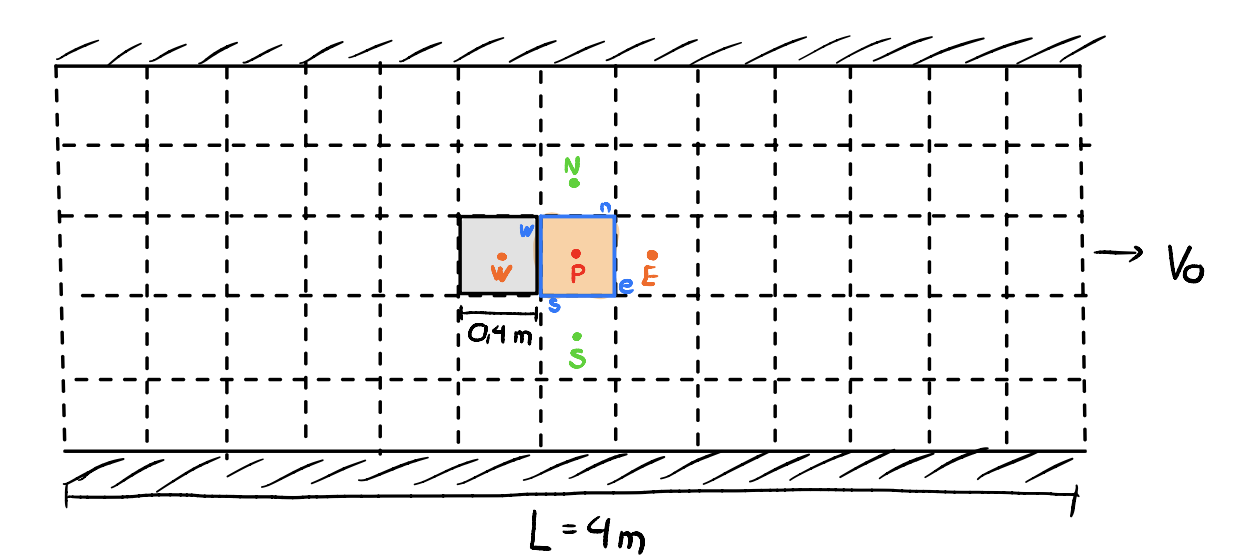
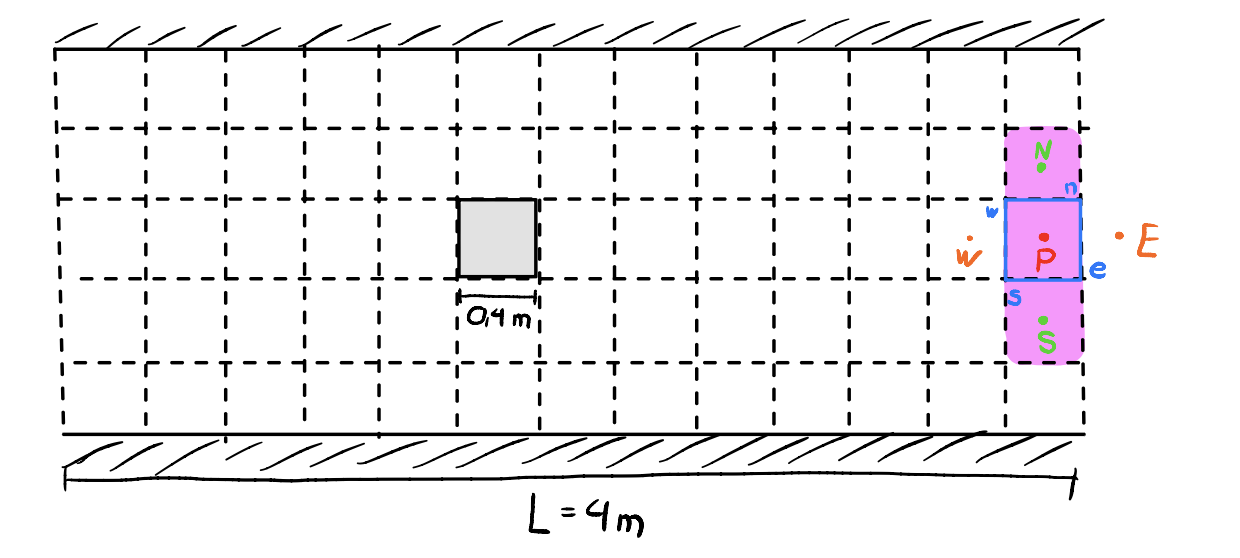
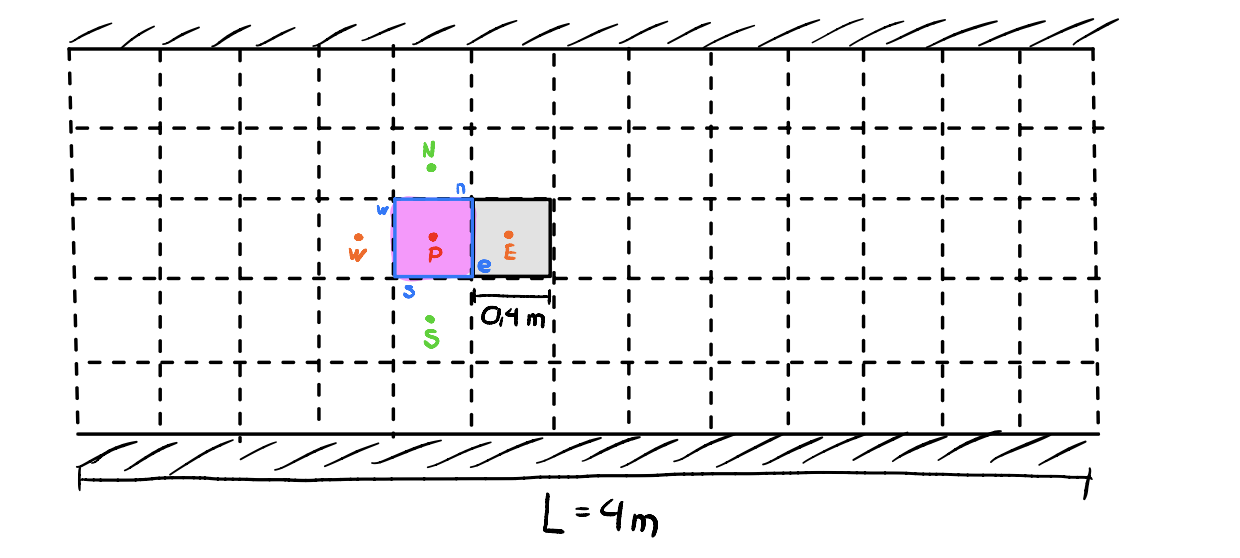
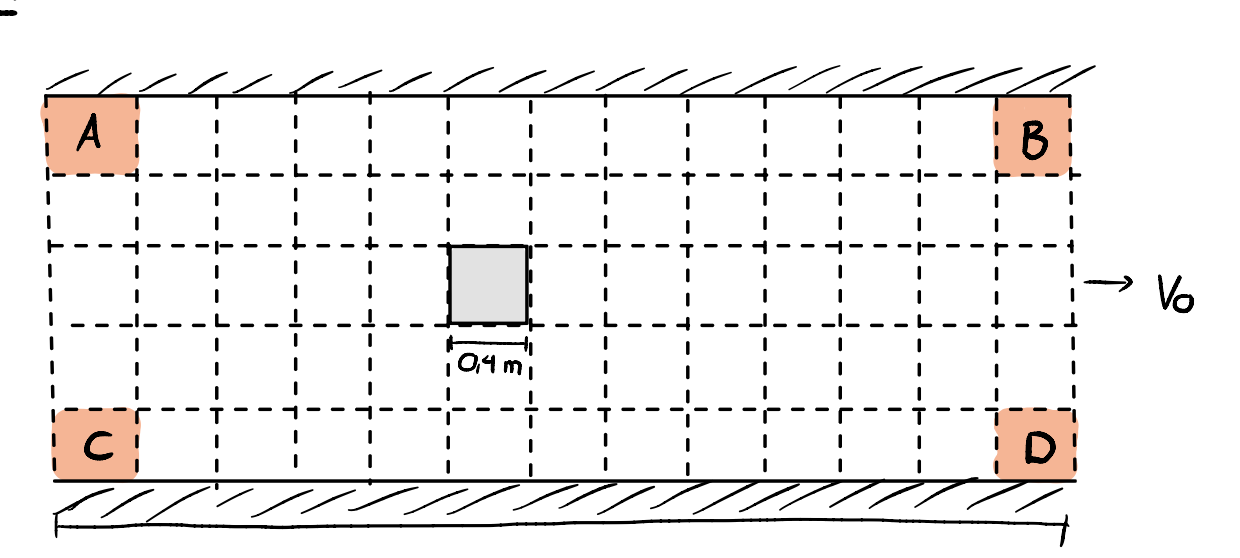

### Código implementado:

Se plantea una malla para plantear las ecuaciones, y luego se resuelve el sistema lineal $A\phi = b$. Posteriormente, con los potenciales se calcula la velocidad utilizando diferencias finitas para posteriormente calcular el campo de presiones utilizando Bernoulli entre un punto de la malla y el punto de entrada, asumiendo que la presión en este punto es conocida

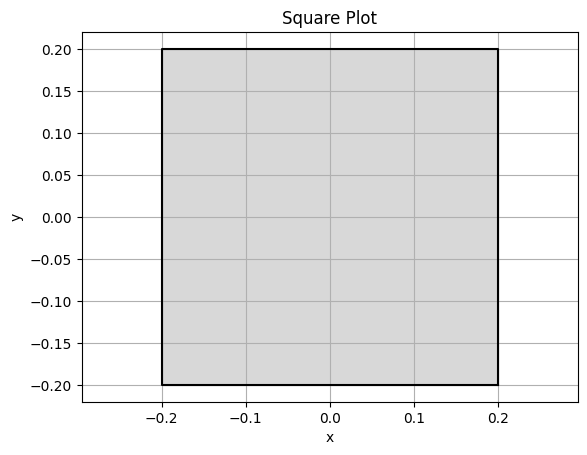

In [33]:
# Plot a square using matplotlib and fill inside the square
square_x = [0.2, 0.2, -0.2, -0.2, 0.2]
square_y = [-0.2, 0.2, 0.2, -0.2, -0.2]
plt.plot(square_x, square_y, color='black')
plt.fill(square_x, square_y, color='gray', alpha=0.3)
plt.title("Square Plot")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.axis('equal')
plt.show()

Ahora, se define la malla con elementos rectangulares de ancho $\Delta x = \Delta y = 0.2\; [m]$ y se grafica

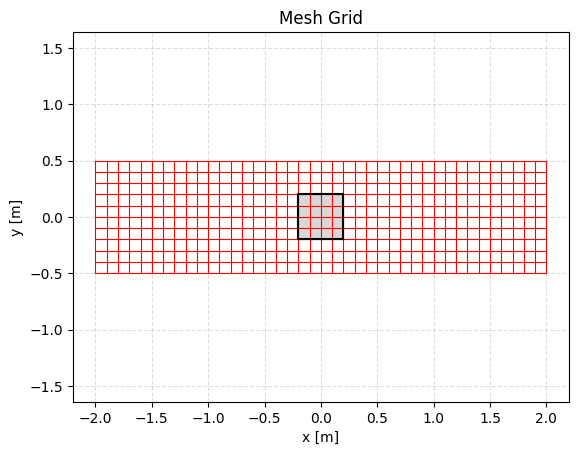

In [34]:
# Parámetros de la malla
delta_x = 0.1
delta_y = 0.1

# Rango de coordenadas
x = np.arange(-2, 2 + delta_x, delta_x)
y = np.arange(-0.5, 0.5 + delta_y, delta_y)

# Crear la malla
X, Y = np.meshgrid(x, y)

# Graficar las líneas de la malla
for i in range(len(y)):  # Líneas horizontales
    plt.plot(X[i, :], Y[i, :], color='red', linewidth=0.8)

for j in range(len(x)):  # Líneas verticales
    plt.plot(X[:, j], Y[:, j], color='red', linewidth=0.8)

# Plot the square again on top of the mesh
plt.plot(square_x, square_y, color='black')
plt.fill(square_x, square_y, color='gray', alpha=0.3)

# Ajustes del gráfico
plt.title("Mesh Grid")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.axis('equal')
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

Ahora, se ubican los nodos en el centro de los elementos de la malla creada anteriormente

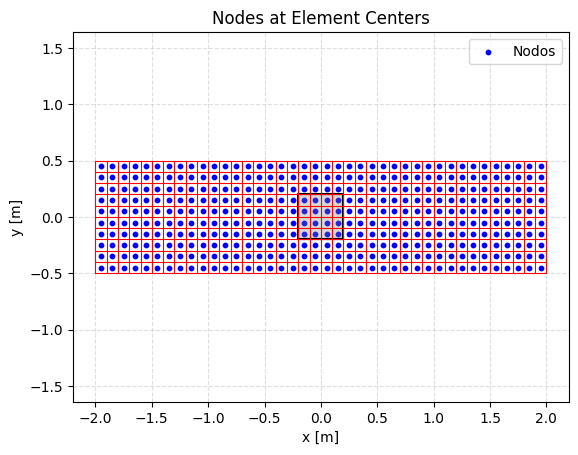

Nodo 1: x = -1.95, y = -0.45
Nodo 2: x = -1.85, y = -0.45
Nodo 3: x = -1.75, y = -0.45
Nodo 4: x = -1.65, y = -0.45
Nodo 5: x = -1.55, y = -0.45
Nodo 6: x = -1.45, y = -0.45
Nodo 7: x = -1.35, y = -0.45
Nodo 8: x = -1.25, y = -0.45
Nodo 9: x = -1.15, y = -0.45
Nodo 10: x = -1.05, y = -0.45
Nodo 11: x = -0.95, y = -0.45
Nodo 12: x = -0.85, y = -0.45
Nodo 13: x = -0.75, y = -0.45
Nodo 14: x = -0.65, y = -0.45
Nodo 15: x = -0.55, y = -0.45
Nodo 16: x = -0.45, y = -0.45
Nodo 17: x = -0.35, y = -0.45
Nodo 18: x = -0.25, y = -0.45
Nodo 19: x = -0.15, y = -0.45
Nodo 20: x = -0.05, y = -0.45
Nodo 21: x = 0.05, y = -0.45
Nodo 22: x = 0.15, y = -0.45
Nodo 23: x = 0.25, y = -0.45
Nodo 24: x = 0.35, y = -0.45
Nodo 25: x = 0.45, y = -0.45
Nodo 26: x = 0.55, y = -0.45
Nodo 27: x = 0.65, y = -0.45
Nodo 28: x = 0.75, y = -0.45
Nodo 29: x = 0.85, y = -0.45
Nodo 30: x = 0.95, y = -0.45
Nodo 31: x = 1.05, y = -0.45
Nodo 32: x = 1.15, y = -0.45
Nodo 33: x = 1.25, y = -0.45
Nodo 34: x = 1.35, y = -0.45
Nod

In [35]:
# Create nodes at the center of each mesh element
node_x = x[:-1] + delta_x / 2
node_y = y[:-1] + delta_y / 2
Node_X, Node_Y = np.meshgrid(node_x, node_y)

# Graficar los nodos
plt.scatter(Node_X, Node_Y, color='blue', s=10, label='Nodos')
# Plot the square again on top of the nodes
plt.plot(square_x, square_y, color='black')
plt.fill(square_x, square_y, color='gray', alpha=0.3)

# Graficar las líneas de la malla
for i in range(len(y)):  # Líneas horizontales
    plt.plot(X[i, :], Y[i, :], color='red', linewidth=0.8)

for j in range(len(x)):  # Líneas verticales
    plt.plot(X[:, j], Y[:, j], color='red', linewidth=0.8)

# Ajustes del gráfico
plt.title("Nodes at Element Centers")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.axis('equal')
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.show()

# Create an array for all the nodes coordinates
nodes_coordinates = np.column_stack((Node_X.ravel(), Node_Y.ravel()))

for i in range(1, len(nodes_coordinates)+1):
    print(f"Nodo {i}: x = {nodes_coordinates[i-1, 0]:.2f}, y = {nodes_coordinates[i-1, 1]:.2f}")


Ahora aplicamos la ecuación de continuidad para cada nodo creado

$$
\nabla \cdot (\nabla \phi) = 0
$$

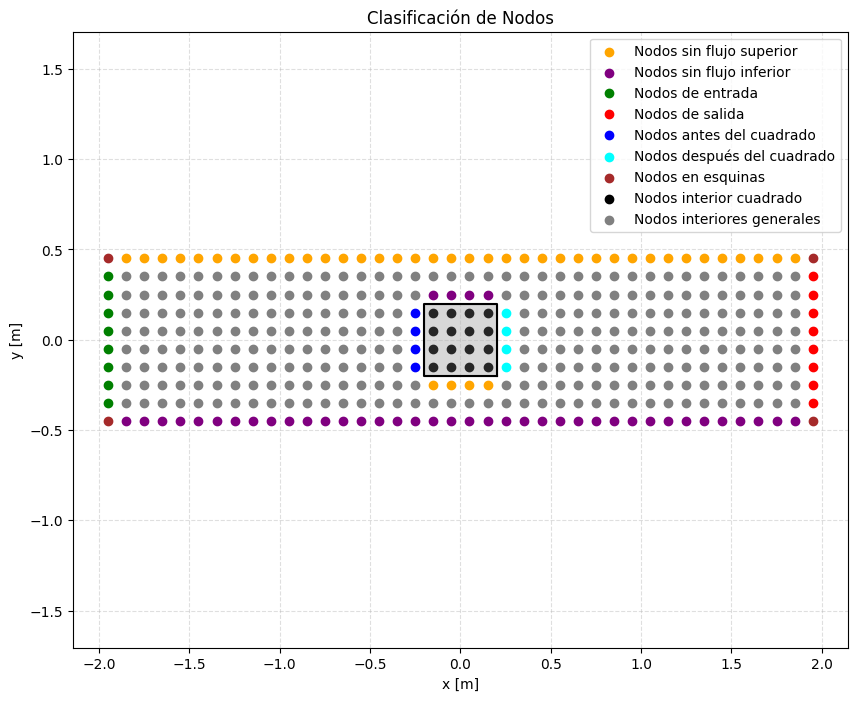

[-200.  100.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.  100.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.   

In [36]:
A = np.zeros((nodes_coordinates.shape[0], nodes_coordinates.shape[0]))
b = np.zeros(nodes_coordinates.shape[0])
v_0 = 2.0  # Velocidad de entrada [m/s]

nodos_flujo_superior = []
nodos_flujo_inferior = []
nodos_entrada = []
nodos_salida = []
nodos_antes_cuadrado = []
nodos_despues_cuadrado = []
nodos_esquinas = []
nodos_interior_cuadrado = []
nodos_interiores_generales = []

# Ahora modificamos la matriz A y el vector b según la ecuación en cada nodo
# para obtener phi resolviendo el sistema de ecuaciones lineales A(phi) = b

for i in range(nodes_coordinates.shape[0]):
    x_i = nodes_coordinates[i, 0]
    y_i = nodes_coordinates[i, 1]

    # Índices de los nodos vecinos
    P = i
    E = i + 1
    W = i - 1
    N = i + 40
    S = i - 40

    # Caso 1: Nodos sin flujo superior
    # 1. y ≈ 0.45, |x| != 1.95 (los del techo que no son esquina)
    # 2. y ≈ -0.25, |x| < 0.2 (parte inferior del cuadrado)
    if (abs(y_i - 0.45) < 1e-2 and abs(abs(x_i) - 1.95) >= 1e-2) or (abs(y_i + 0.25) < 1e-2 and abs(x_i) < 0.2):
        nodos_flujo_superior.append((x_i, y_i))
        A[i, P] = (-2 / (delta_x ** 2)) + (-1 / (delta_y ** 2))
        A[i, E] = 1 / (delta_x ** 2)
        A[i, W] = 1 / (delta_x ** 2)
        A[i, S] = 1 / (delta_y ** 2)
        
    # Caso 2: Nodos sin flujo inferior
    # 1. y ≈ -0.45, |x| != 1.95 (los del piso que no son esquina)
    # 2. y ≈ 0.25, |x| < 0.2 (parte superior del cuadrado)
    elif (abs(y_i + 0.45) < 1e-2 and abs(abs(x_i) - 1.95) >= 1e-2) or (abs(y_i - 0.25) < 1e-2 and abs(x_i) < 0.2):
        nodos_flujo_inferior.append((x_i, y_i))
        A[i, P] = (-2 / (delta_x ** 2)) + (-1 / (delta_y ** 2))
        A[i, E] = 1 / (delta_x ** 2)
        A[i, W] = 1 / (delta_x ** 2)
        A[i, N] = 1 / (delta_y ** 2)
    
    # Caso 3: Nodos de entrada
    # 1. x ≈ -1.95, |y| <= 0.45
    elif abs(x_i + 1.95) < 1e-2 and abs(y_i) < 0.4:
        nodos_entrada.append((x_i, y_i))
        A[i, N] = (1 / (delta_y ** 2))
        A[i, S] = (1 / (delta_y ** 2))
        A[i, E] = (1 / (delta_x ** 2))
        A[i, P] = (-2 / (delta_y ** 2)) + (-1 / (delta_x ** 2))
        b[i] = v_0 / delta_x 

    # Caso 4: Nodos de salida
    # 1. x ≈ 1.95, |y| <= 0.45
    elif abs(x_i - 1.95) < 1e-2 and abs(y_i) < 0.4:
        nodos_salida.append((x_i, y_i))
        A[i, N] = (1 / (delta_y ** 2))
        A[i, S] = (1 / (delta_y ** 2))
        A[i, W] = (1 / (delta_x ** 2))
        A[i, P] = (-2 / (delta_y ** 2)) + (-1 / (delta_x ** 2))
        b[i] = - v_0 / delta_x

    # Caso 5: Nodo después del cuadrado
    # 1. x ≈ 0.25, |y| < 0.2
    elif abs(x_i - 0.25) < 1e-2 and abs(y_i) < 0.2:
        nodos_despues_cuadrado.append((x_i, y_i))
        A[i, N] = (1 / (delta_y ** 2))
        A[i, S] = (1 / (delta_y ** 2))
        A[i, E] = (1 / (delta_x ** 2))
        A[i, P] = (-2 / (delta_y ** 2)) + (-1 / (delta_x ** 2))

    # Caso 6: Nodos antes del cuadrado
    # 1. x ≈ -0.25, |y| < 0.2
    elif abs(x_i + 0.25) < 1e-2 and abs(y_i) < 0.2:
        nodos_antes_cuadrado.append((x_i, y_i))
        A[i, N] = (1 / (delta_y ** 2))
        A[i, S] = (1 / (delta_y ** 2))
        A[i, W] = (1 / (delta_x ** 2))
        A[i, P] = (-2 / (delta_y ** 2)) + (-1 / (delta_x ** 2))

    # Caso 7: Esquina superior izquierda
    elif abs(x_i + 1.95) < 1e-2 and abs(y_i - 0.45) < 1e-2:
        nodos_esquinas.append((x_i, y_i))
        A[i, S] = (1 / (delta_y ** 2))
        A[i, E] = (1 / (delta_x ** 2))
        A[i, P] = (-1 / (delta_y ** 2)) + (-1 / (delta_x ** 2))
        b[i] = v_0 / delta_x

    # Caso 8: Esquina inferior izquierda
    elif abs(x_i + 1.95) < 1e-2 and abs(y_i + 0.45) < 1e-2:
        nodos_esquinas.append((x_i, y_i))
        A[i, N] = (1 / (delta_y ** 2))
        A[i, E] = (1 / (delta_x ** 2))
        A[i, P] = (-1 / (delta_y ** 2)) + (-1 / (delta_x ** 2))
        b[i] = v_0 / delta_x

    # Caso 9: Esquina superior derecha
    elif abs(x_i - 1.95) < 1e-2 and abs(y_i - 0.45) < 1e-2:
        nodos_esquinas.append((x_i, y_i))
        A[i, S] = (1 / (delta_y ** 2))
        A[i, W] = (1 / (delta_x ** 2))
        A[i, P] = (-1 / (delta_y ** 2)) + (-1 / (delta_x ** 2))
        b[i] = - v_0 / delta_x

    # Caso 10: Esquina inferior derecha
    elif abs(x_i - 1.95) < 1e-2 and abs(y_i + 0.45) < 1e-2:
        nodos_esquinas.append((x_i, y_i))
        A[i, N] = (1 / (delta_y ** 2))
        A[i, W] = (1 / (delta_x ** 2))
        A[i, P] = (-1 / (delta_y ** 2)) + (-1 / (delta_x ** 2))
        b[i] = - v_0 / delta_x

    # Caso 11: Nodos dentro del cuadrado (sin flujo)
    elif (abs(x_i) < 0.2) and (abs(y_i) < 0.2):
        nodos_interior_cuadrado.append((x_i, y_i))
        A[i, P] = 1.0
        b[i] = 0.0

    # Caso 12: Nodos interiores generales
    else:
        nodos_interiores_generales.append((x_i, y_i))
        A[i, N] = (1 / (delta_y ** 2))
        A[i, S] = (1 / (delta_y ** 2))
        A[i, E] = (1 / (delta_x ** 2))
        A[i, W] = (1 / (delta_x ** 2))
        A[i, P] = (-2 / (delta_y ** 2)) + (-2 / (delta_x ** 2))


# Plot the collected nodes for verification
plt.figure(figsize=(10, 8))
plt.scatter(*zip(*nodos_flujo_superior), color='orange', label='Nodos sin flujo superior')
plt.scatter(*zip(*nodos_flujo_inferior), color='purple', label='Nodos sin flujo inferior')
plt.scatter(*zip(*nodos_entrada), color='green', label='Nodos de entrada')
plt.scatter(*zip(*nodos_salida), color='red', label='Nodos de salida')
plt.scatter(*zip(*nodos_antes_cuadrado), color='blue', label='Nodos antes del cuadrado')
plt.scatter(*zip(*nodos_despues_cuadrado), color='cyan', label='Nodos después del cuadrado')
plt.scatter(*zip(*nodos_esquinas), color='brown', label='Nodos en esquinas')
plt.scatter(*zip(*nodos_interior_cuadrado), color='black', label='Nodos interior cuadrado')
plt.scatter(*zip(*nodos_interiores_generales), color='gray', label='Nodos interiores generales')
plt.plot(square_x, square_y, color='black')
plt.fill(square_x, square_y, color='gray', alpha=0.3)
plt.title("Clasificación de Nodos")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.axis('equal')
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.show()

for row in A:
    print(row)

Resolvemos el sistema lineal y graficamos las líneas equipotenciales para analizar el sentido físico del resultado

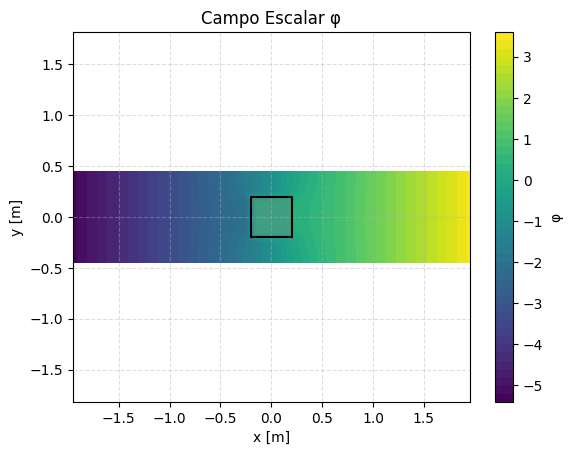

Nodo -1.95, -0.45 -> φ = -5.2872

Nodo -1.85, -0.45 -> φ = -5.0872

Nodo -1.75, -0.45 -> φ = -4.8872

Nodo -1.65, -0.45 -> φ = -4.6871

Nodo -1.55, -0.45 -> φ = -4.4871

Nodo -1.45, -0.45 -> φ = -4.2870

Nodo -1.35, -0.45 -> φ = -4.0869

Nodo -1.25, -0.45 -> φ = -3.8867

Nodo -1.15, -0.45 -> φ = -3.6863

Nodo -1.05, -0.45 -> φ = -3.4855

Nodo -0.95, -0.45 -> φ = -3.2841

Nodo -0.85, -0.45 -> φ = -3.0816

Nodo -0.75, -0.45 -> φ = -2.8770

Nodo -0.65, -0.45 -> φ = -2.6686

Nodo -0.55, -0.45 -> φ = -2.4536

Nodo -0.45, -0.45 -> φ = -2.2272

Nodo -0.35, -0.45 -> φ = -1.9821

Nodo -0.25, -0.45 -> φ = -1.7096

Nodo -0.15, -0.45 -> φ = -1.4057

Nodo -0.05, -0.45 -> φ = -1.0864

Nodo 0.05, -0.45 -> φ = -0.7629

Nodo 0.15, -0.45 -> φ = -0.4436

Nodo 0.25, -0.45 -> φ = -0.1397

Nodo 0.35, -0.45 -> φ = 0.1328

Nodo 0.45, -0.45 -> φ = 0.3779

Nodo 0.55, -0.45 -> φ = 0.6044

Nodo 0.65, -0.45 -> φ = 0.8194

Nodo 0.75, -0.45 -> φ = 1.0277

Nodo 0.85, -0.45 -> φ = 1.2323

Nodo 0.95, -0.45 -> φ = 1.434

In [37]:
# Resolver el sistema de ecuaciones lineales
phi = np.linalg.solve(A, b)

# Graficar el campo escalar φ
plt.tricontourf(nodes_coordinates[:, 0], nodes_coordinates[:, 1], phi, levels=50, cmap='viridis')
plt.colorbar(label='φ')
plt.plot(square_x, square_y, color='black')
plt.fill(square_x, square_y, color='gray', alpha=0.3)
plt.title("Campo Escalar φ")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.xlim(-2, 1)
plt.axis('equal')
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

for i in range(nodes_coordinates.shape[0]):
    print(f"Nodo {nodes_coordinates[i, 0]:.2f}, {nodes_coordinates[i, 1]:.2f} -> φ = {phi[i]:.4f}\n")


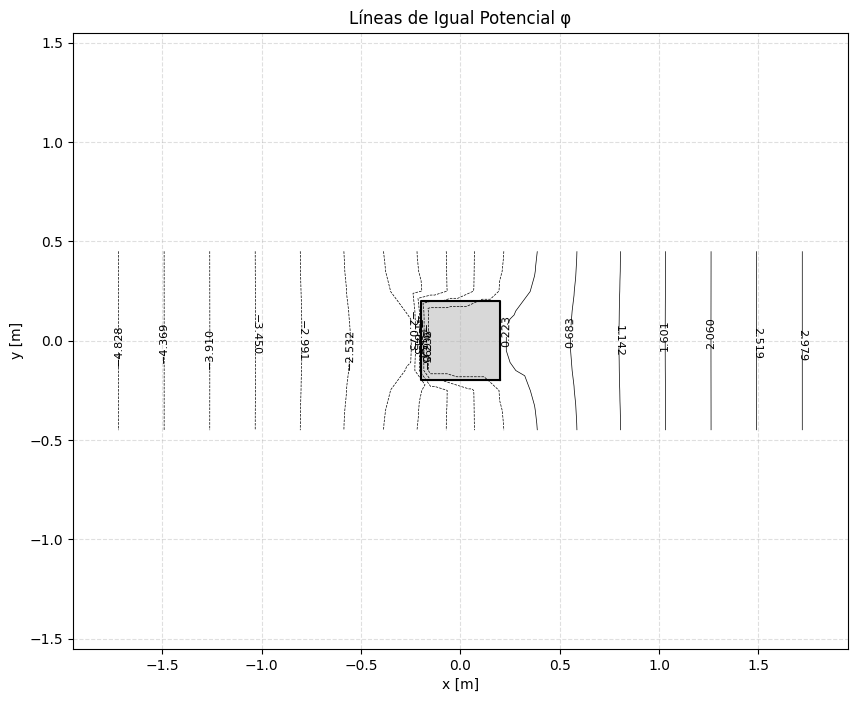

In [38]:
# Graficar las líneas del mismo potencial phi
plt.figure(figsize=(10, 8))
contour_levels = np.linspace(np.min(phi), np.max(phi), 20)
contours = plt.tricontour(nodes_coordinates[:, 0], nodes_coordinates[:, 1], phi, levels=contour_levels, colors='black', linewidths=0.5)
plt.clabel(contours, inline=True, fontsize=8)
plt.plot(square_x, square_y, color='black')
plt.fill(square_x, square_y, color='gray', alpha=0.3)
plt.title("Líneas de Igual Potencial φ")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.xlim(-2, 1)
plt.axis('equal')
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

Se ve que las líneas equipotenciales tienen sentido. Por lo tanto, se prosigue calculando la velocidad utilizando diferencias finitas

$$
u = \frac{\partial \phi}{\partial x} \quad v = \frac{\partial \phi}{\partial y}
$$

Para evitar considerar los cambios abruptos en el potencial para nodos verticales que se encuentran cerca del cuadrado, para nodos sobre el cuadrado se utilizan diferencias progresivas, mientras que para nodos bajo el cuadrado se utilizan diferencias retrógradas

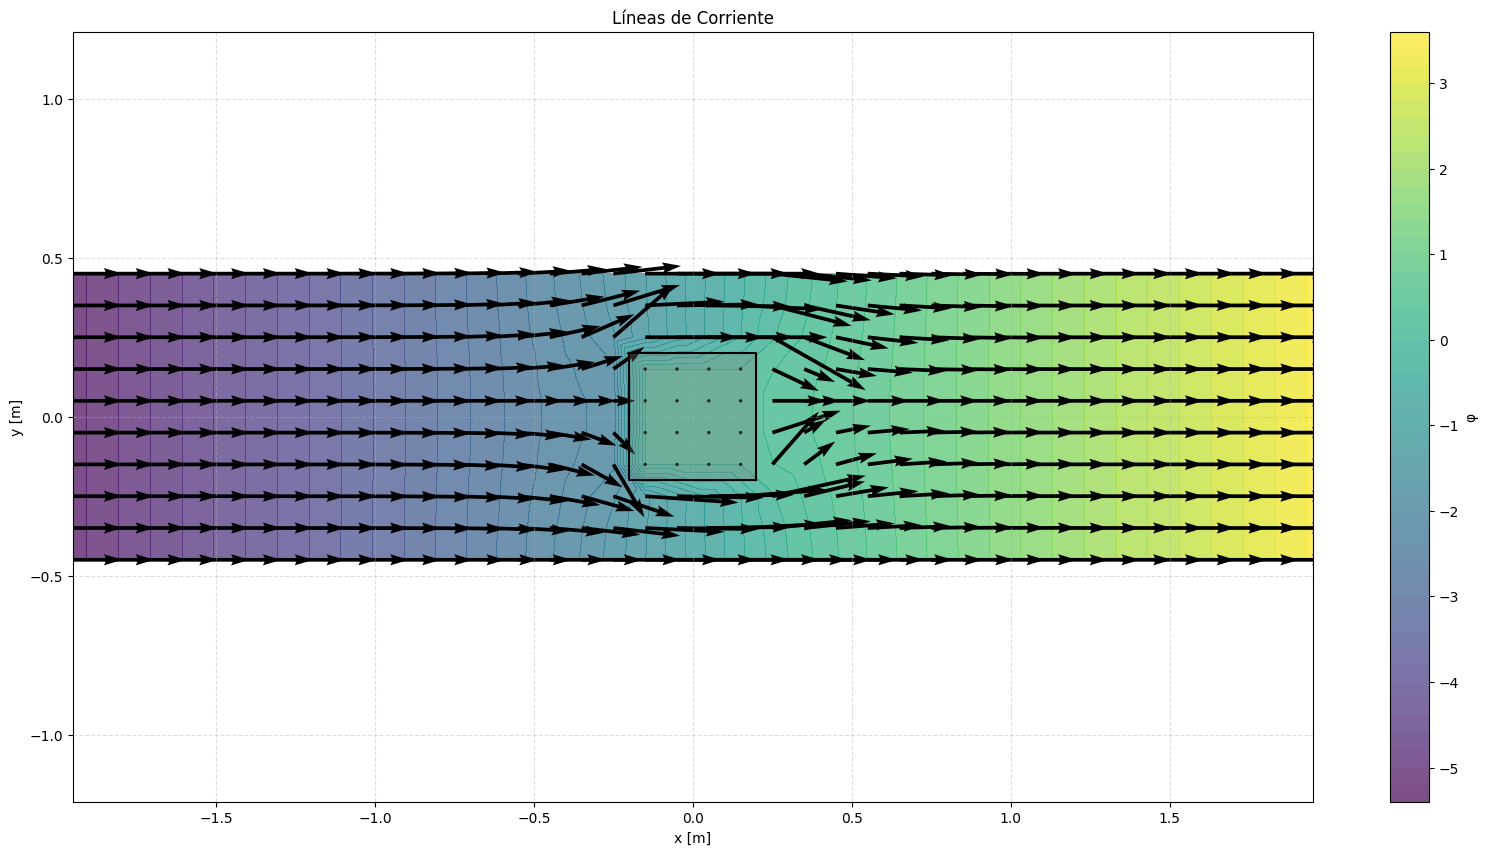

In [45]:
# Calcular el campo de velocidades usando las derivadas de φ (fuera del cuadrado)
u = np.zeros(nodes_coordinates.shape[0])  # Componente x de la velocidad
v = np.zeros(nodes_coordinates.shape[0])  # Componente y de la velocidad



for i in range(nodes_coordinates.shape[0]):
    x_i = nodes_coordinates[i, 0]
    y_i = nodes_coordinates[i, 1]

    # Índices de los nodos vecinos
    P = i
    E = i + 1
    W = i - 1
    N = i + 40
    S = i - 40

    # Calcular u usando diferencias retrógradas (componente x)
    if (x_i < 1.95 - delta_x / 2) and (x_i > -1.95 + delta_x / 2):
        u[i] = (phi[P] - phi[W]) / (delta_x)
    elif x_i <= -1.95 + delta_x / 2:
        u[i] = (phi[E] - phi[P]) / delta_x
    elif x_i >= 1.95 - delta_x / 2:
        u[i] = (phi[P] - phi[W]) / delta_x


    # Calcular v usando diferencias retrógradas (componente y)

    # Cuando estamos debajo del cuadrado usamos diferencias retrógradas
    # Cuando estamos encima del cuadrado usamos diferencias progresivas

    if np.abs(x_i) < 0.2:
        # Caso 1: y está debajo del cuadrado
        if (y_i < 0.2 - delta_y / 2) and (y_i > -0.45 + delta_y / 2):
            v[i] = (phi[P] - phi[S]) / (delta_y)
        # Caso 2: y está encima del cuadrado    
        elif y_i >= 0.2 + delta_y / 2 and (y_i < 0.45 - delta_y / 2):
            v[i] = (phi[N] - phi[P]) / delta_y
    else:
        v[i] = (phi[P] - phi[S]) / (delta_y)


    # Para nodos dentro del cuadrado, la velocidad es cero
    if (abs(x_i) < 0.2) and (abs(y_i) < 0.2):
        u[i] = 0.0
        v[i] = 0.0

# Graficar las líneas de corriente
plt.figure(figsize=(20, 10))
plt.tricontourf(nodes_coordinates[:, 0], nodes_coordinates[:, 1], phi, levels=50, cmap='viridis', alpha=0.7)
plt.colorbar(label='φ')
plt.quiver(nodes_coordinates[:, 0], nodes_coordinates[:, 1], u, v, color='black', scale=50)
plt.plot(square_x, square_y, color='black')
plt.fill(square_x, square_y, color='gray', alpha=0.3)
plt.title("Líneas de Corriente")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.axis('equal')
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()



Por último, se calculr el campo de presiones usando Bernoulli, asumiendo que a la entrada del flujo hay una presión $P_0$.

$$
P_0 + \frac{1}{2}\rho v_0^2 = P + \frac{1}{2}\rho v^2
$$

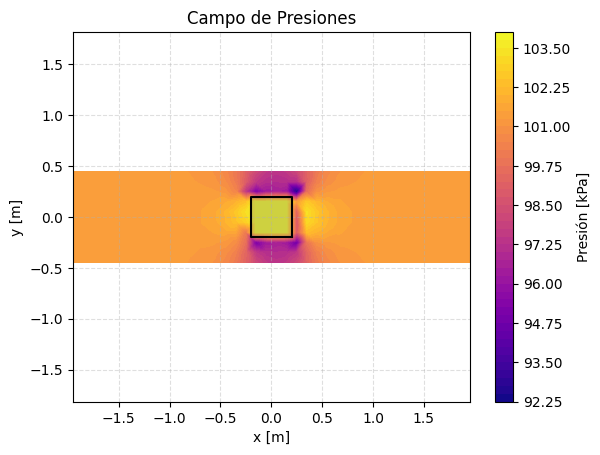

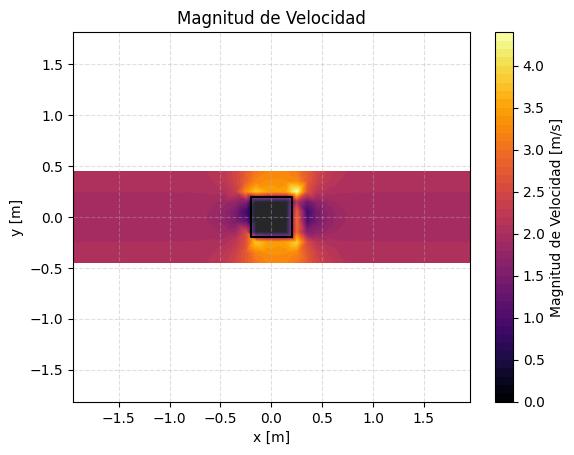

In [46]:
velocidad_magnitud = np.sqrt(u**2 + v**2)
P_0 = 101325/1e3  # Presión de entrada [kPa]
rho = 1.225  # Densidad del aire [kg/m^3]
P = P_0 + 0.5 * rho * (v_0**2 - velocidad_magnitud**2)
# Graficar el campo de presiones
plt.tricontourf(nodes_coordinates[:, 0], nodes_coordinates[:, 1], P, levels=50, cmap='plasma')
plt.colorbar(label='Presión [kPa]')
plt.plot(square_x, square_y, color='black')
plt.fill(square_x, square_y, color='gray', alpha=0.3)   
plt.title("Campo de Presiones")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.axis('equal')
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

# Graficar las magnitudes de velocidad
plt.tricontourf(nodes_coordinates[:, 0], nodes_coordinates[:, 1], velocidad_magnitud, levels=50, cmap='inferno')
plt.colorbar(label='Magnitud de Velocidad [m/s]')
plt.plot(square_x, square_y, color='black')
plt.fill(square_x, square_y, color='gray', alpha=0.3)   
plt.title("Magnitud de Velocidad")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.axis('equal')
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

Se puede ver que tanto delante como detrás del cuadrado se generan zonas de alta presión, las cuales se originan por la disminución de la velocidad. Por otra parte, cuando el fluido esquiva al cuadrado, su velocidad aumenta por lo que su presión baja. Esta relación de presión-velocidad vista desde el punto de vista del flujo potencial permite predecir de forma simplificada cual será la fuerza de sustentación o arrastre de un cierto objeto. En este caso, dada la simetría del cuadrado, ambas fuerzas debiesen ser cero.

## Pregunta 2: Use el método de volúmenes finitos con un esquema de interpolación QUICK. Considere un dominio computacional de un metro de largo, una difusividad de $\Gamma = 0,1$ $kg/(ms)$. El caudal másico por unidad de área es de $m'' = 0,2$ $kg/(sm^2)$. Asegúrese que su solución no dependa de la discretización elegida. Presente la solución en forma gráfica.

La propiedad $\phi$ es transportada mediante la siguiente ecuación de difusión-addvección:

$$
\frac{d}{dx} (\rho u \phi) = \frac{d}{dx}(\Gamma \frac{\partial \phi}{\partial x})
$$

La cual debe ser resuelta en paralelo con la ecuación de continuidad

$$
\frac{d}{dx}(\rho u) = 0
$$

Las condiciones de borde son $\phi(0) = \phi_A$ y $\phi(L) = \phi_L$

Por su parte, el esquema QUICK nos dice que para interpolar el valor de una propiedad en la cara del volumen de control, se puede realizar utilizando tres nodos. Para el caso de una malla cuadrada 1D cuyo espesor en cada celda es el mismo, la interpolación queda independiente del espesor de la malla, y se obtiene:

$$
\phi_{face} = \frac{6}{8}\phi_U + \frac{3}{8}\phi_D - \frac{1}{8}\phi_{UU}
$$

Donde $U$ es el primer nodo aguas arriba de la cara, $D$ es el primer nodo aguas abajo de lacara y $UU$ es el segundo nodo aguas arriba de la cara.

Utilizando FVM en un cierto volumen de control para el sistema de ecuaciones se tiene que:

$$
(\rho u)_e = (\rho u)_w
$$

$$
(\rho u \phi)_e - (\rho u \phi)_w = (\Gamma \frac{\partial \phi}{\partial x})_e - (\Gamma \frac{\partial \phi}{\partial x})_w
$$


Se definirá $(\rho u)_e = F_e$, $(\rho u)_w = F_w$, donde por enunciado $F_e = F_w = \dot{m}''$. Debido a que por esquema QUICK se requieren los nodos $U$, $D$ y $UU$, se define una ecuación para nodos desde el 2 hasta el n-1, una ecuación para el nodo 1, una ecuación para el nodo 0 y una ecuación para el nodo n

**Nodos intermedios**

- $\phi_e = \frac{6}{8}\phi_P + \frac{3}{8}\phi_E - \frac{1}{8}\phi_W$
- $\phi_w = \frac{6}{8}\phi_W + \frac{3}{8}\phi_P - \frac{1}{8}\phi_{WW}$
- $(\frac{\partial \phi}{\partial x})_e \approx \frac{\phi_E - \phi_P}{\Delta x}$
- $(\frac{\partial \phi}{\partial x})_2 \approx \frac{\phi_P - \phi_W}{\Delta x}$

Así:

$$
F_e \left[ \frac{6}{8}\phi_P + \frac{3}{8}\phi_E - \frac{1}{8}\phi_W \right] - F_w \left[ \frac{6}{8}\phi_W + \frac{3}{8}\phi_P - \frac{1}{8}\phi_{WW} \right] \\
    = \frac{\Gamma}{\Delta x} \left[ \phi_E - 2\phi_P + \phi_W \right]
$$


**Último nodo**
- $\phi_e = \phi_L$
- $\phi_w = \frac{6}{8}\phi_{W_n} + \frac{3}{8}\phi_{P_n} - \frac{1}{8}\phi_{WW_{n}}$
- $(\frac{\partial \phi}{\partial x})_e \approx \frac{1}{\Delta x} [\frac{8}{3} \phi_L - \frac{9}{3}\phi_{P_n} + \frac{1}{3} \phi_{W_n}]$
- $(\frac{\partial \phi}{\partial x})_w \approx \frac{\phi_{P_n} - \phi_{W_n}}{\Delta x}$

Así: 

$$
F_e \phi_L - F_w[\frac{6}{8}\phi_{W_n} + \frac{3}{8}\phi_{P_n} - \frac{1}{8}\phi_{WW_{n}}] \\
    = \frac{\Gamma}{\Delta x}([\frac{8}{3} \phi_L - \frac{9}{3}\phi_{P_n} + \frac{1}{3} \phi_{W_n}] - [\phi_{P_n} - \phi_{W_n}])
$$

**Nodo 0 (inicial)**

Para calcular el primer nodo, se crea un "nodo fantasma" a una distancia $\Delta x$ hacia la izquierda desde el nodo cero. El valor de este nodo fantasma se obtiene extrapolando usando $\phi_0$ y $\phi_A$:

$$
\phi_{W_0} = \phi_A + \frac{\phi_A - \phi_0}{\Delta x / 2} \cdot \Delta x = 2\phi_A - \phi_0
$$

Así:

- $\phi_{e} = \frac{7}{8}\phi_0 + \frac{3}{8}\phi_1 - \frac{2}{8}\phi_A$
- $\phi_{w} = \phi_A$
- $(\frac{\partial \phi}{\partial x})_e \approx \frac{\phi_{E_n} - \phi_{P_n}}{\Delta x}$
- $(\frac{\partial \phi}{\partial x})_w \approx \frac{1}{\Delta x} [\frac{9}{3}\phi_{P_0} - \frac{8}{3} \phi_A - \frac{1}{3} \phi_{E_1}]$

Así:

$$
F_e [ \frac{7}{8}\phi_0 + \frac{3}{8}\phi_1 - \frac{2}{8}\phi_A] - F_w \phi_A \\
    = \frac{D}{\Delta x} (\phi_{E_0} - \phi_{W_0} - [\frac{9}{3}\phi_{P_0} - \frac{8}{3} \phi_A - \frac{1}{3} \phi_{E_1}])
$$

**Nodo 1 (después del inicial)**

Usamos la expresión de $\phi_{W_0}$ calculada en el inciso anterior como $\phi_{UU}$ para calcular $\phi_w$.

- $\phi_e = \frac{6}{8}\phi_{P_1} + \frac{3}{8}\phi_{E_1} - \frac{1}{8}\phi_{W_1}$
- $\phi_w = \frac{7}{8}\phi_{W_1} + \frac{3}{8}\phi_{P_1} - \frac{2}{8}\phi_{A}$
- $(\frac{\partial \phi}{\partial x})_e \approx \frac{\phi_{E_1} - \phi_{P_1}}{\Delta x}$
- $(\frac{\partial \phi}{\partial x})_2 \approx \frac{\phi_{P_1} - \phi_{W_1}}{\Delta x}$

Así:

$$
F_e [\frac{6}{8}\phi_{P_1} + \frac{3}{8}\phi_{E_1} - \frac{1}{8}\phi_{W_1}] - F_w [\frac{7}{8}\phi_{W_1} + \frac{3}{8}\phi_{P_1} - \frac{2}{8}\phi_{A}] \\
    = \frac{\Gamma}{\Delta x} \left[ \phi_{E_1} - 2\phi_{P_1} + \phi_{W_1} \right]
$$


### Código implementado:

Se crea una función que recibe un cierto número de nodos e implementa las ecuaciones descritas para cada nodo, para posteriormente resolverlas utilizando $A\phi = b$. Para cada número de nodos probado, se grafica $\phi$ en función de $x$

In [41]:
def quick_scheme(n):
    A = np.zeros((n, n))
    b = np.zeros(n)
    L = 1
    m = 0.2
    Gamma = 0.1

    # Definición de parámetros
    delta_x = L / n
    Fe = m
    Fw = m
    D = Gamma / delta_x
    phi_A = 1
    phi_L = 0

    for i in range(2, n-1):
        A[i, i] = ((6/8)*Fe) - ((3/8)*Fw) + (2*D) # Coeficiente en nodo P
        A[i, i+1] = ((3/8)*Fe) - D # Coeficiente en nodo E
        A[i, i-1] = ((-1/8)*Fe) - ((6/8)*Fw) - D # Coeficiente en nodo W
        A[i, i-2] = (1/8)*Fw # Coeficiente en nodo WW

    # Implementación de la ecuación en el nodo 0 (primer nodo)
    A[0, 0] = ((7/8)*Fe) + (4*D) # Coeficiente en nodo P (nodo 0)
    A[0, 1] = ((3/8)*Fe) - ((4/3)*D) # Coeficiente en nodo E (nodo 1)
    b[0] = phi_A * (\
        Fw + ((2/8)*Fe) + ((8/3)*D))

    # Implementación de la ecuación en el nodo 1 (segundo nodo)
    A[1, 0] = ((-1/8)*Fe) - ((7/8)*Fw) - D # Coeficiente en nodo W (nodo 0)
    A[1, 1] = ((6/8)*Fe) - ((3/8)*Fw) + (2*D) # Coeficiente en nodo P (nodo 1)
    A[1, 2] = ((3/8)*Fe) - D # Coeficiente en nodo E (nodo 2)
    b[1] = - phi_A * ((2/8)*Fw)

    # Implementación de la ecuación en el nodo n (último nodo)
    A[n-1, n-3] = (1/8)*Fw # Coeficiente en nodo WW (nodo n-3)
    A[n-1, n-2] =  - ((6/8)*Fw) - ((4/3)*D) # Coeficiente en nodo W (nodo n-2)
    A[n-1, n-1] = - ((3/8)*Fw) + (4*D) # Coeficiente en nodo P (nodo n-1)
    b[n-1] = phi_L * (\
        -Fe + ((11/3)*D))

    # for row in A:
    #     print(row)

    # for value in b:
    #     print(value)

    phi = np.linalg.solve(A, b)
    # print(phi)

    # Plot the solution
    x = np.linspace(delta_x/2, 1 - delta_x/2, n) # Ubicación de los nodos
    plt.plot(x, phi, marker='o', color='red')
    plt.title(f"Solución de φ usando Esquema QUICK con {n} nodos")
    plt.xlabel("x")
    plt.ylabel("φ")
    plt.grid()
    plt.show()

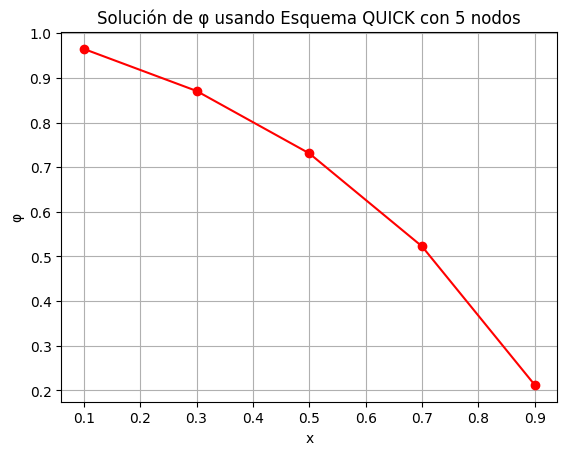

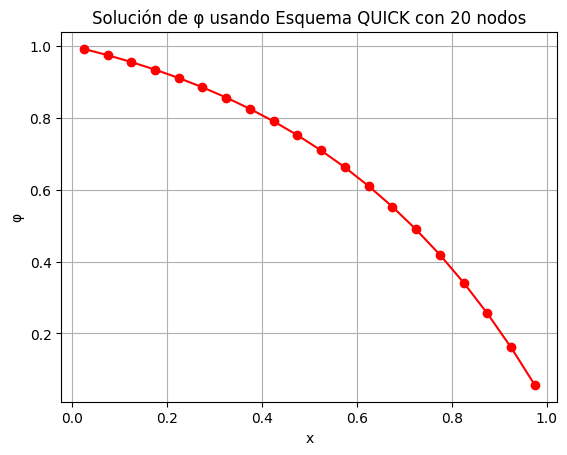

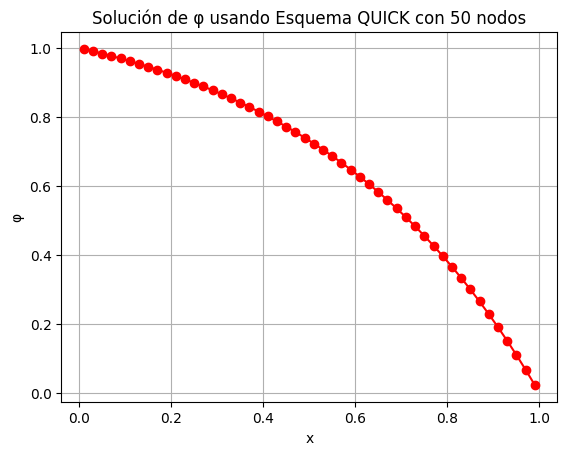

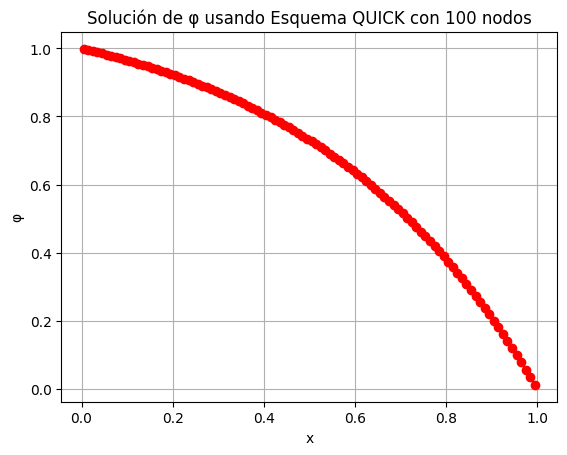

In [42]:
quick_scheme(5)
quick_scheme(20)
quick_scheme(50)
quick_scheme(100)


Se puede ver que la propiedad $\phi$ tiene una caída mientras que avanza en $x$. Por otra parte, una mayor cantidad de nodos permite obtener una mejor resolución de la propiedad $\phi$ con el costo de que demora más tiempo en concluir

## Pregunta 3: Por una tobera plana 2-dimensional como la mostrada en la figura pasa un flujo constante sin fricción. Suponga que la densidad del flujo es constante. Obtenga velocidades y presiones usando el método SIMPLE. Laforma de la tobera sigue la siguiente función: $A(x)= 0.5− 0.6x + 0.2x^2$

Para resolver el siguiente sistema sin considerar efectos viscosos, se deben resolver simultáneamente la ecuación de Navier-Stokes junto con la ecuación de continuidad.

$$
\frac{d}{dx}(\rho uuA) = -A \frac{dP}{dx}  
$$

$$
\frac{d}{dx}(\rho uA) = 0
$$

Usando FVM, la forma disctetizada de estas ecuaciones es:

$$
(\rho uA)_e - (\rho uA)_w = 0
$$

$$
(\rho uA)_e u_e^* - (\rho uA)_w u_w^* = -A_p (P_e^* - P_w^*)
$$

Para resolver este sistema con el algoritmo SIMPLE, se deben realizar los siguientes pasos:

1) **Dar valores iniciales de $u$ y $P^*$ que cumplan la ecuación de continuidad**

Para esto, se impone un cierto flujo másico $\dot{m}$ el cual permite calcular las velocidades, mientras que las presiones se determinan arbitrariamente.

2) **Resolver la ecuación de conservación de momentum para despejar $u^*$**

Se debe resolver el sistema de ecuaciones. Para ello, dadas las condiciones de borde del sistema, se tendrán las siguientes ecuaciones:

***Nodos intermedios***

Para los nodos intermedios, se posee la siguiente ecuación:

$$
[\rho A_e \frac{u_E + u_P}{2}]u_P^* - [\rho A_w \frac{u_P + u_W}{2}]u_W^* = -A_P (P_e^* - P_w^*)
$$

***Primer nodo***

En el primer nodo, como se conoce la presión de estancamiento $P_A = P_0 - \frac{1}{2}\rho u_A^2$, donde $u_A$ es expresada en función de $u_1$. Además, para aproximar el flujo másico en la cara oeste se utiliza el mismo nodo P

$$
[\rho A_e \frac{u_2 + u_1}{2}]u_P^* - [\rho u_1 A_1]u_1 \frac{A_1}{A_A} = -A_1(P_B^* - P_0 + \frac{1}{2} \rho u_1^* u_1 (\frac{A_1}{A_A})^2)
$$

***Último nodo***

En el último nodo, el flujo másico por la cara este se aproxima como el flujo por el último nodo

$$
(\rho uA)_P u_P^* - [\rho A_w \frac{u_P + u_W}{2}]u_W^* = -A_P (P_e^* - P_w^*)
$$

3) **Se definen correcciones $u = u^* + u'$ y $P = P^* + P'$**

4) **Se calcula $d_p$ para cada nodo**

La ecuación de momentum puede ser escrita de la siguiente forma para las correcciones:

$$
a_p u_p´= \sum_{\text{otros nodos}}a_{nb} u_{nb}' + (P_w' - P_e')A_p
$$

Si se simplifica el término relacionado a los otros nodos, se obtiene entonces que:

$$
u'_P = d_P (P'_w - P'_e), \quad \text{donde } d_P = \frac{A_P}{a_P}
$$

5) **Con el valor de $d_p$ para cada nodo, calcular la velocidad corregida**

La corregida está dada por:

$$
u_p = u_p' + d_p (P'_w - P'_e)
$$

6) **Calcular $P'$ para de tal forma que se satisfaga la ecuación de continuidad**

Se plantean las ecuaciones de conservación de momentum, las cuales dependen de $P'$

$$
\rho A_e u_e^* + \rho A_e d_e (P_E' - P_P') = \rho A_w u_w^* + \rho A_w d_w (P_P' - P_W') 
$$

Nota: Para este caso, tanto las correcciones en el primer nodo como en el último caso son cero.

7) **En caso de que $P' \neq 0$, corregir las velocidades y presiones para la siguiente iteración con un factor de relajación**

Para que el sistema no diverga, la velocidad que debe ser ingresada previa al paso 2 están dadas por:

$$
u_{new} = (1 - \alpha_u) u_{old} + \alpha_u  u^*
$$
$$
P_{new} = (1 - \alpha_P) P_{old} + \alpha_P  P^*
$$


### Código implementado

Se crea una función que recibe un cierto número de nodos y simula las iteraciones requeridas por el método SIMPLE. El criterio de convergencia es que $|P'| < 10^{-5}$. Se ejecuta el algoritmo para distintod nodos y se compara el flujo másico obtenido con el flujo másico real, el cual puede ser obtenido mediante Bernoulli entre el punto de estancamiento y el final de la tobera.

$$
\dot{m}_{teórico} = \rho \sqrt{\frac{2P_0}{\rho}} A_{final}
$$

In [43]:
def cross_area(x):
    # return 0.5 + ((0.1 - 0.5) / 2) * x
    return 0.5 - (0.6 * x) + (0.2 * (x ** 2))

# Definimos los parámetros del problema
L = 2
rho = 1 # kg/m^3
P0 = 10  # Pa
P_end = 0  # Pa
alpha_p = 0.001
alpha_u = 0.001
bernoullis_mass_flow_rate = rho * np.sqrt(2 * (P0 - P_end) / rho) * cross_area(L)
print(f"Caudal másico según Bernoulli: {bernoullis_mass_flow_rate} kg/s")



def simple_algoritm(nodes_number):
    delta_x = L / nodes_number
    
    # Armar el área transversal en cada nodo de velocidad
    velocity_areas = []
    i = 0
    while ((2*i) + 1) * delta_x / 2 <= L:
        velocity_areas.append(cross_area(((2*i) + 1) * delta_x / 2 ))
        i += 1

    # Armar el área transversal en cada nodo de presión
    pressures_areas = []
    j = 0
    while (j * delta_x) <= L:
        pressures_areas.append(cross_area(j * delta_x))
        j += 1

    # Creamos un gradiente de presión inicial y unas velocidades iniciales que cumplan continuidad
    initial_pressures = np.linspace(P0, P_end, nodes_number + 1)
    initial_velocities = [1 / A for A in velocity_areas]  # Velocidades iniciales arbitrarias

    SIMPLE_converged = False
    iteraciones = 1
    while not SIMPLE_converged:
        # Matriz para despejar u^*    
        M = np.zeros((len(initial_velocities), len(initial_velocities)))
        dP_vector = np.zeros(len(initial_velocities))
        d_values = np.zeros((len(initial_velocities)))

        # SIMPLE para nodos intermedios
            
        for i in range(1, len(initial_velocities) - 1):
            u_P = initial_velocities[i]
            u_E = initial_velocities[i+1]
            u_W = initial_velocities[i-1]

            # Cargamos la matriz M
            M[i, i] = rho * pressures_areas[i+1] * ((u_P + u_E) / 2)
            M[i, i-1] = - rho * pressures_areas[i] * ((u_P + u_W) / 2)

            # Cargamos el vector dP
            dP_vector[i] = - velocity_areas[i] * (initial_pressures[i+1] - initial_pressures[i])
            d_values[i] = velocity_areas[i] / (rho * pressures_areas[i+1] * ((u_P + u_E) / 2))

            
        # SIMPLE para el primer nodo
        Fw = rho * velocity_areas[0] * initial_velocities[0]
        Fe = rho * ((initial_velocities[0] + initial_velocities[1]) / 2) * pressures_areas[1]
        M[0, 0] = Fe + ((Fw / 2) * ((velocity_areas[0] / pressures_areas[0]) ** 2))
        dP_vector[0] = - velocity_areas[0] * (initial_pressures[1] - P0) + \
            (Fw * initial_velocities[0] * ((velocity_areas[0] / pressures_areas[0])))
        d_values[0] = velocity_areas[0] / (Fe + ((Fw / 2) * ((velocity_areas[0] / pressures_areas[0]) ** 2)))

        # SIMPLE para el último nodo
        Fw = rho * ((initial_velocities[-2] + initial_velocities[-1]) / 2) * pressures_areas[-2]
        Fe = rho * velocity_areas[-1] * initial_velocities[-1]
        M[-1, -1] = Fe
        M[-1, -2] = - Fw
        dP_vector[-1] = - velocity_areas[-1] * (initial_pressures[-1] - initial_pressures[-2]) 
        d_values[-1] = velocity_areas[-1] / Fe

        # Resolver
        u_prima = np.linalg.solve(M, dP_vector)

        # Ahora despejamos las correcciones de presión p'

        # Matriz para despejar p'
        N = np.zeros((len(initial_pressures), len(initial_pressures)))
        b_p_vector = np.zeros(len(initial_pressures))

        # Revisar bien el tema de los signos cuando lo pase al látex
        for i in range(1, len(initial_pressures) - 1):
            u_E_prima = u_prima[i]
            u_W_prima = u_prima[i-1]

            N[i, i-1] = - rho * d_values[i - 1] * velocity_areas[i - 1] # Info para coeficiente W
            N[i, i+1] = - rho * d_values[i] * velocity_areas[i] # Info para coeficiente E
            N[i, i] = (rho * d_values[i - 1] * velocity_areas[i - 1]) + (rho * d_values[i] * velocity_areas[i]) # Info para coeficiente P
            b_p_vector[i] = - (rho * velocity_areas[i] * u_E_prima) + (rho * velocity_areas[i - 1] * u_W_prima)

        # SIMPLE para el primer nodo
        N[0, 0] = 1

        # SIMPLE para el último nodo
        N[-1, -1] = 1

        # Resolver
        p_prima = np.linalg.solve(N, b_p_vector)

        # Confirmar si se satisface simultáneamente la ecuación de continuidad y momentum con los valores corregidos

        updated_velocities = np.zeros(len(initial_velocities))
        for i in range(len(initial_velocities)):
            updated_velocities[i] = u_prima[i] + (d_values[i] * (p_prima[i] - p_prima[i+1]))

        updated_pressures = initial_pressures + p_prima
        # Presión inicial
        updated_pressures[0] = P0 - (0.5 * rho * updated_velocities[0]**2 * (velocity_areas[0] / pressures_areas[0])**2)
                                                            
        # Criterio de convergencia: Que los p' sean pequeños

        error = np.linalg.norm(p_prima)

        if error < 1e-5:
            SIMPLE_converged = True

            # print(f"SIMPLE convergió en {iteraciones} iteraciones.")
            # Plot the final results
            x_nodes = np.linspace(delta_x / 2, L - delta_x / 2, len(updated_velocities))
            plt.figure(figsize=(12, 6))
            plt.subplot(1, 2, 1)
            plt.plot(x_nodes, updated_velocities, marker='o')
            plt.title('Velocidades a lo largo de la tobera')
            plt.xlabel('Distancia (m)')
            plt.ylabel('Velocidad (m/s)')
            plt.grid()

            plt.subplot(1, 2, 2)
            pressure_nodes = np.linspace(0, L, len(updated_pressures))
            plt.plot(pressure_nodes, updated_pressures, marker='o', color='r')
            plt.title('Presiones a lo largo de la tobera')
            plt.xlabel('Distancia (m)')
            plt.ylabel('Presión (Pa)')
            plt.grid()

            plt.tight_layout()
            plt.suptitle(f'Algoritmo SIMPLE con {nodes_number} nodos', y=1.02)
            plt.show()

            mass_rate = rho * updated_velocities * velocity_areas

            return mass_rate[0]
        
        else:
            # print(f"Iteración {iteraciones}: Error de p': {error}")
            # Corregir las velocidades y presiones para la siguiente iteración
            new_velocities = alpha_u * np.array(updated_velocities) + (1 - alpha_u) * np.array(initial_velocities)
            new_pressures = alpha_p * updated_pressures  + (1-alpha_p) * initial_pressures

            initial_velocities = new_velocities
            initial_pressures = new_pressures
            iteraciones += 1

Caudal másico según Bernoulli: 0.44721359549995837 kg/s


Probamos la función para distintos números de nodos

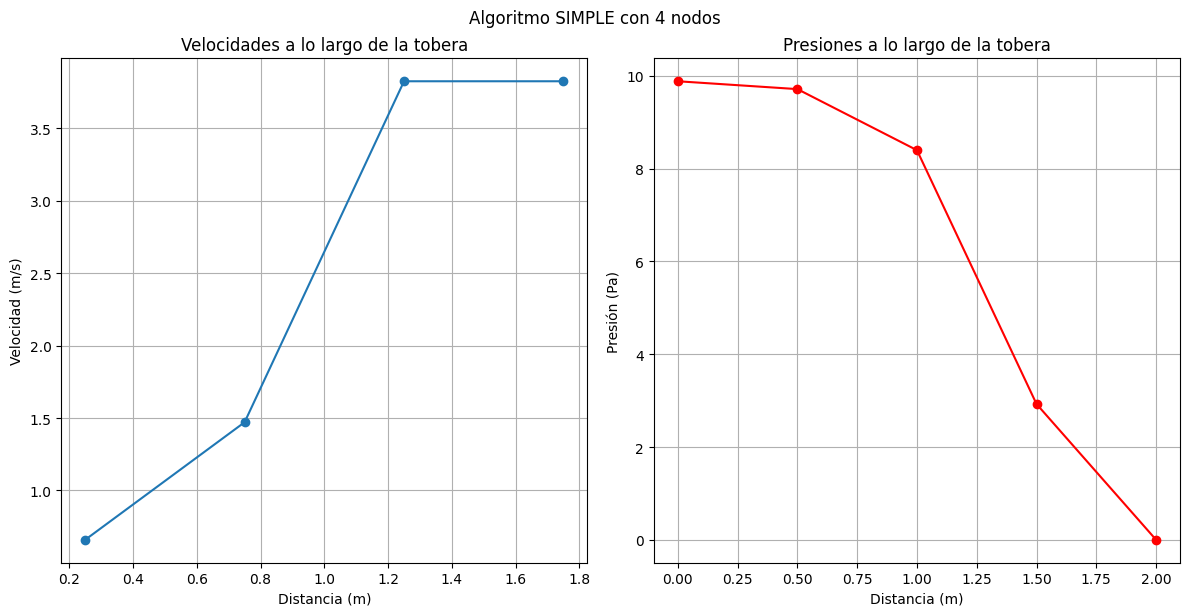

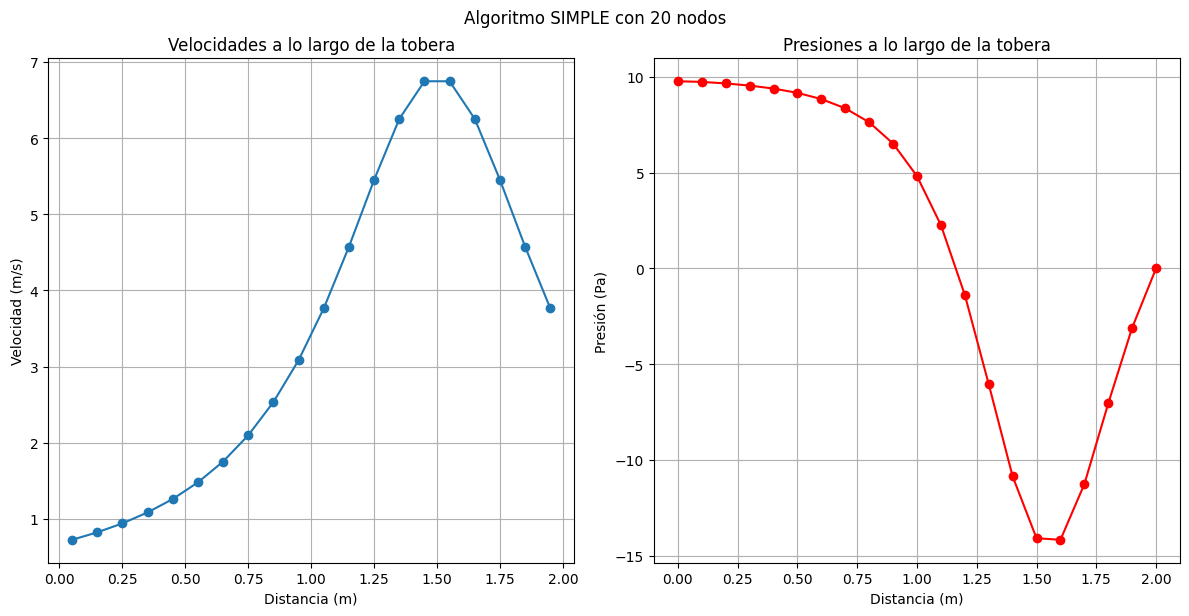

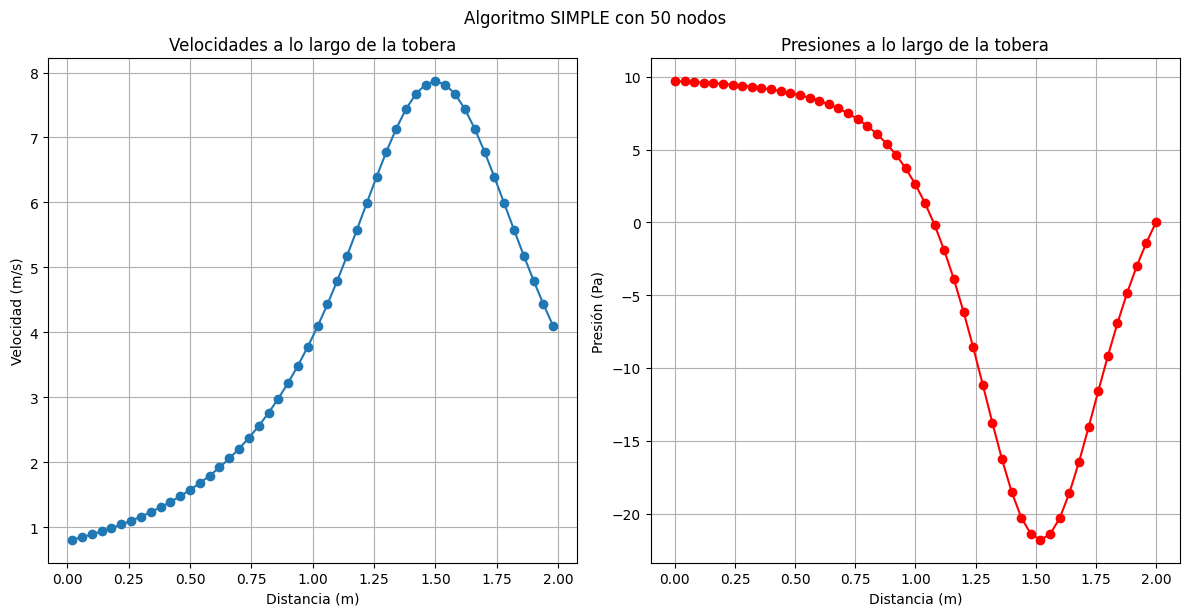

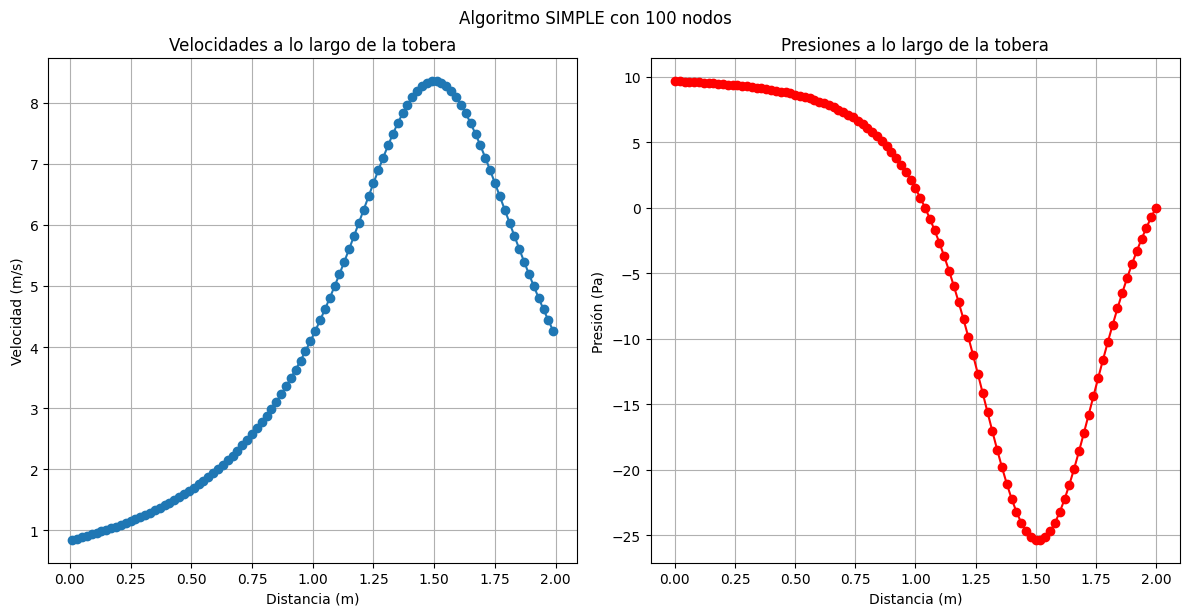

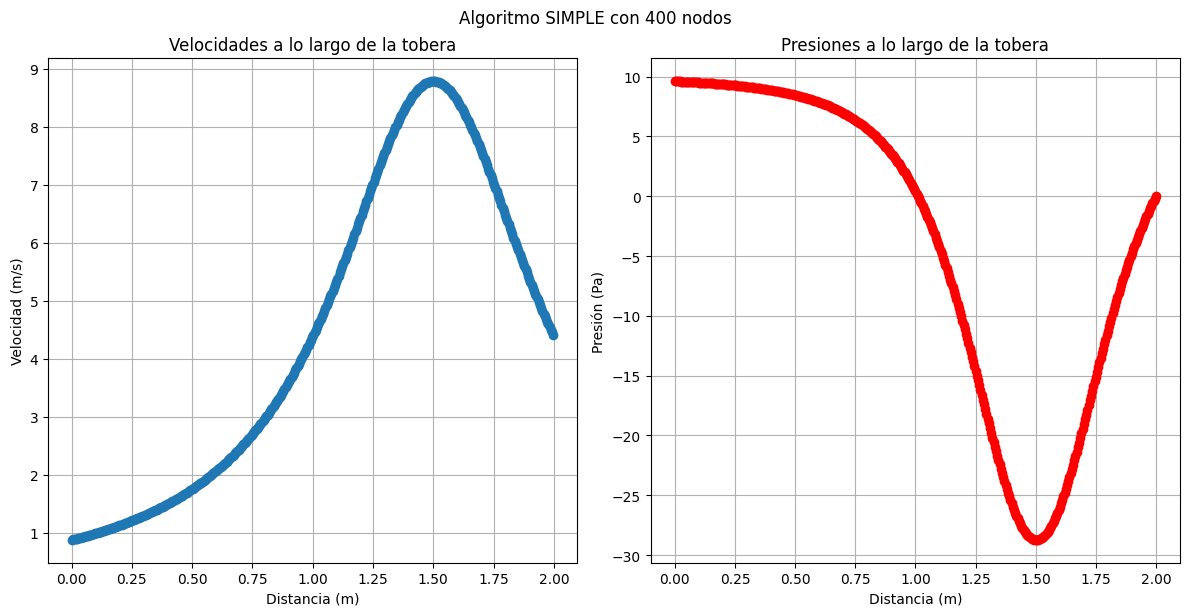

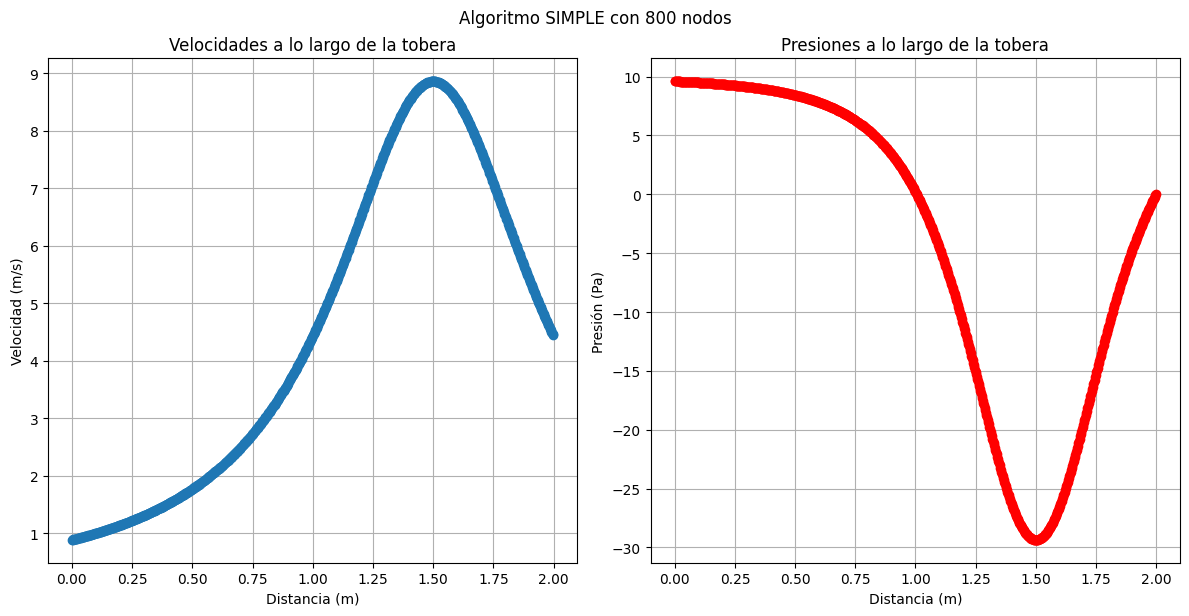

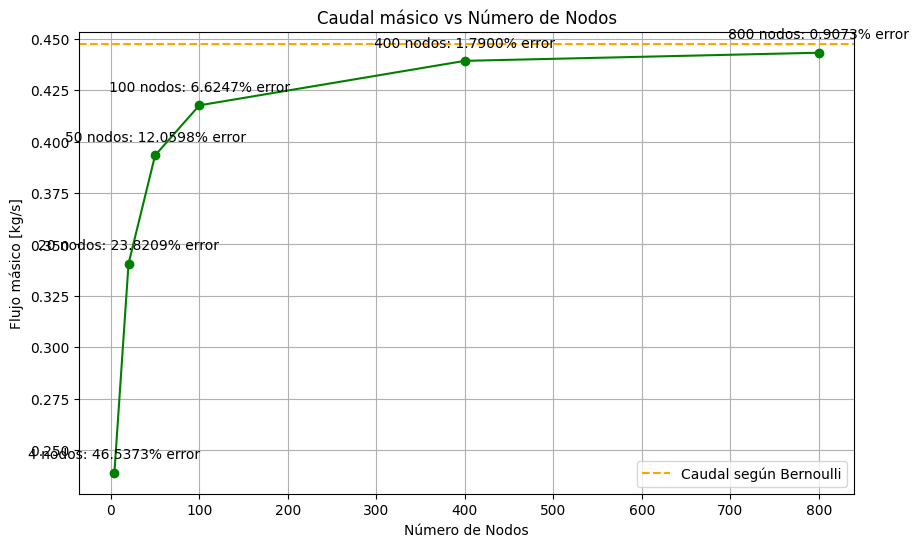

In [44]:
nodes_list = [4, 20, 50, 100, 400, 800]
mass_flow_list = []
label_list = []

for n in nodes_list:
    mass_flow = simple_algoritm(n)
    mass_flow_list.append(mass_flow)
    error_percentage = abs((mass_flow - bernoullis_mass_flow_rate) / bernoullis_mass_flow_rate) * 100
    label_list.append(f"{n} nodos: {error_percentage:.4f}% error")

# Plot the mass flow rates
plt.figure(figsize=(10, 6))
plt.plot(nodes_list, mass_flow_list, marker='o', color="green")
for i, txt in enumerate(label_list):
    plt.annotate(txt, (nodes_list[i], mass_flow_list[i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.axhline(y=bernoullis_mass_flow_rate, color='orange', linestyle='--', label='Caudal según Bernoulli')
plt.title('Caudal másico vs Número de Nodos')
plt.xlabel('Número de Nodos')
plt.ylabel('Flujo másico [kg/s]')
# plt.xscale('log')
plt.grid()
plt.legend()
plt.show()

Se puede ver que, si bien el algoritmo converge para bajos números de nodos, esta posee un error bastante considerable, por lo que para utilizar un algoritmo SIMPLE es necesario utilizar un número importante de nodos. Además, para que converga, es necesario utilizar un factor de relajación $\alpha$ muy pequeño, ya que de otra forma el problema diverge. Esto demuestra que el método SIMPLE es muy inestable. Además, un mayor número de nodos aumenta considerablemente el tiempo que toma la simulación